## Agenda
* Get a taste of plotting with `matplotlib` (*de facto* plotting in python)
* Take `ggplot` (grammer of graphics plotting) out for a spin

In [2]:
# familiar imports at top
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# matplotlib and ggplot are very verbose
import warnings
warnings.filterwarnings('ignore')

## Matplotlib

**A simple line plot**

In [4]:
# our data
x = np.linspace(0, 2, 10)
x

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

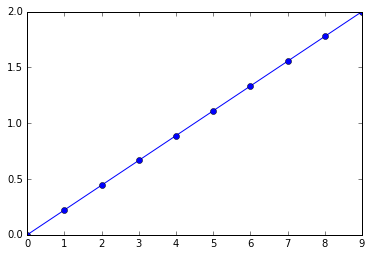

In [5]:
# call plot method
plt.plot(x, 'o-') # 'o-' is a line with circle markers

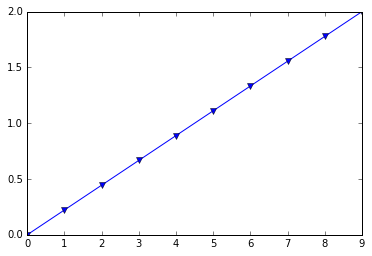

In [6]:
# try changing the plot to use triangle markers (uncomment below and add data from above or your own)
plt.plot(x, '-v')

**A fancier line plot**

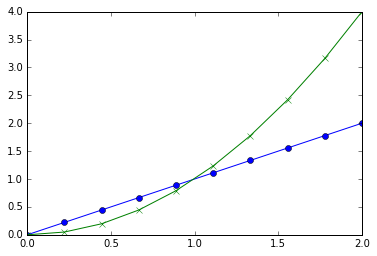

In [7]:
# two lines on a plot

# call plot once
plt.plot(x, x, 'o-', label='linear') # line with circle markers

# call plot twice
plt.plot(x, x ** 2, 'x-', label='quadratic') # line with cross markers

What happens if you call `plot` a third time?  Try it!

**Add helpful info to same plot** (legends, labels, etc.)

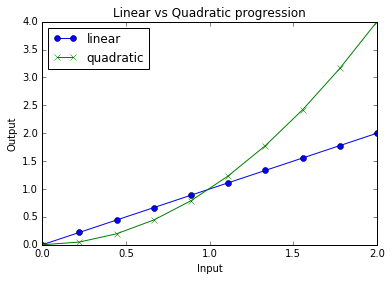

In [8]:
# call plot once
plt.plot(x, x, 'o-', label='linear')

# call plot twice
plt.plot(x, x ** 2, 'x-', label='quadratic')

# add some helpful info to the plot
plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output')

**A simple scatter plot** (with helpful info)

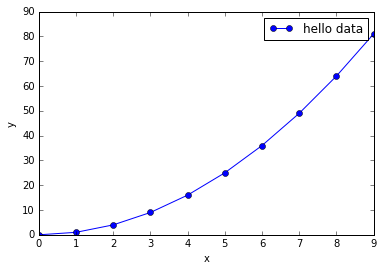

In [9]:
# data
x = np.arange(10)
y = x ** 2

# plot!
plt.plot(x, y, '-o') # line w/ circle markers

# helpful info
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['hello data'], loc = 'best')

# there's also a scatter function, but plot has more general options
# plt.scatter(x, y)

**A simple histogram**

In [10]:
# data for hist
samples = np.random.normal(loc=1.0, scale=0.5, size=1000)

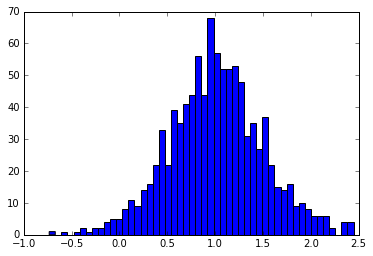

In [11]:
_ = plt.hist(samples, bins=50)

**Aside: making subplots with `figure` and `subplot`**

In [12]:
# data
x = np.arange(100)
y = np.cos(x)
z = np.cos(np.pi * x)

(-2, 2)

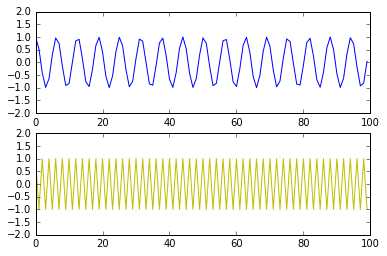

In [13]:
# figure and subplots
fig = plt.figure()

# first subplot
ax1 = fig.add_subplot(2,1,1) # two rows, one column, first plot
ax1.plot(x, y)
ax1.set_ylim([-2, 2])

# another subplot
ax2 = fig.add_subplot(212) # alternate notation
ax2.plot(x, z, color = 'y') # add color as well
ax2.set_ylim([-2, 2])

## `ggplot` 
* **grammer of graphics for python, finally!**

In [16]:
%matplotlib inline
from ggplot import *
import numpy as np

### Easiest to see how `ggplot` works in terms of layers

#### Built-in dataset `mtcars` (yes, just like `ggplot2` in R)
* `mtcars` is a `pandas` DataFrame, FYI

In [17]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**mtcars format**

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon<br>
[, 2]	cyl	Number of cylinders<br>
[, 3]	disp	Displacement (cu.in.)<br>
[, 4]	hp	Gross horsepower<br>
[, 5]	drat	Rear axle ratio<br>
[, 6]	wt	Weight (1000 lbs)<br>
[, 7]	qsec	1/4 mile time<br>
[, 8]	vs	V/S<br>
[, 9]	am	Transmission (0 = automatic, 1 = manual)<br>
[,10]	gear	Number of forward gears<br>
[,11]	carb	Number of carburetors<br>

Source: Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391Ã¢ÂÂ411.

### Preprocessing (continuous to discrete)
* Create a couple new columns with some numerical values converted to strings to indicate they should be interpreted as discrete by `ggplot`

In [18]:
mtcars['am_str'] = ['automatic' if x == 0 else 'manual' for x in mtcars['am']]
mtcars['cyl_str'] = ['4' if x == 4.0 else '6' if x == 6.0 else '8' for x in mtcars['cyl']]

### `ggplot` example 1: simple x-y plot

<b>Create the "canvas" and attach data to it</b> (again, if you use R, you will think this is the same...it is)

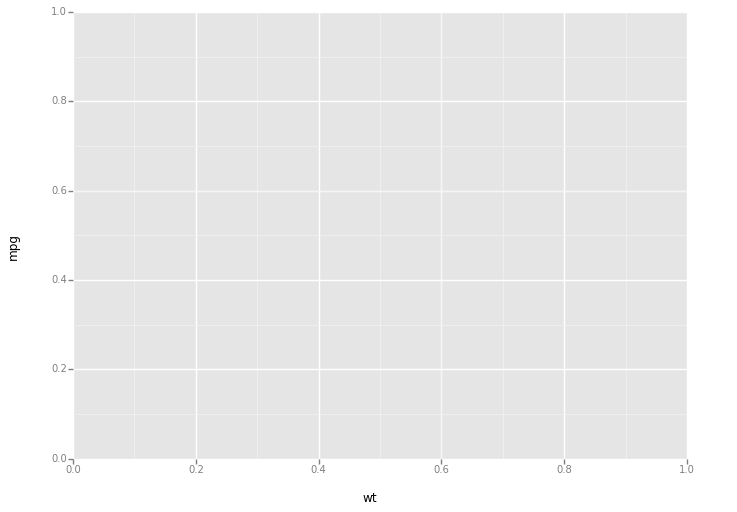

<ggplot: (-9223372036570413894)>

In [19]:
p = ggplot(aes(x='wt', y='mpg'), data=mtcars)
p

<b>Add some points</b>

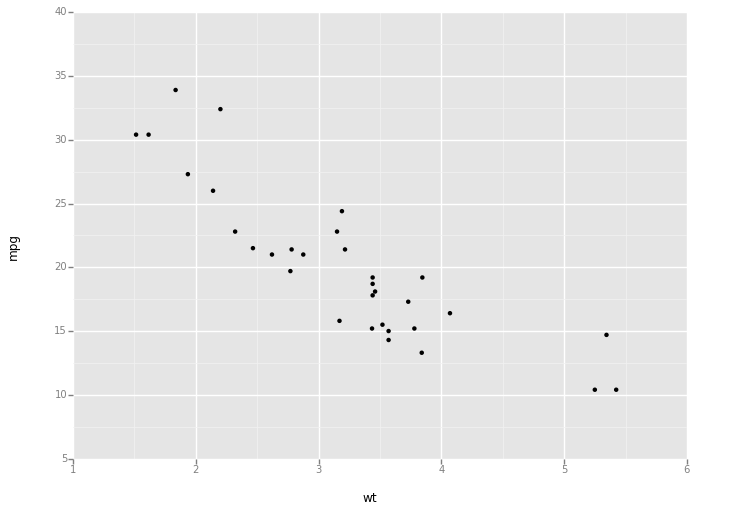

<ggplot: (-9223372036570413894)>

In [20]:
p = p + geom_point()
p

<b>Add a trendline</b>
This is done by
```python
stat_smooth(color="blue")
```

In [ ]:
# add the trendline.  Fill in the blanks.
# p = ___ + ___
# p

In [ ]:
# add the trendline.  Filled in blanks.
p = p + stat_smooth(color = 'blue')
p

<b>Let's be a good data scientist and add units (might as well give the plot a title)</b>

In [ ]:
p = ggplot(aes(x='wt', y='mpg'), data=mtcars) +\
    geom_point() +\
    stat_smooth(color="blue") +\
    xlab("Weight (in 1000 lbs)") + ylab("MPG") +\
    ggtitle("1974 Motor Trend Data for 32 Cars (1973Ã¢ÂÂ74 models)")

p

### `ggplot` example 2: x-y plot with colors and shapes

It'll look like:


```python
ggplot(data, aes(x='x', y='y', color='var1', shape = 'var2')) ...
```

Where **`color`** with automatically pick colors for the categorical variable `var1` and **`shape`** will auto-pick a shape for the categorical variable `var2`.

In [ ]:
# peek at data
diamonds.head()

In [ ]:
# summary stats - remember this from DataAnalysis?  Fill in blank.
# diamonds.___(include='all')

In [ ]:
# summary stats - remember this from DataAnalysis?  Filled in blank.
diamonds.describe(include='all')

In [ ]:
# log-log scale for x and y
diamonds['carat_log'] = np.log(diamonds['carat'])
diamonds['price_log'] = np.log(diamonds['price'])

p = ggplot(diamonds, aes(x='carat_log', y='price_log', color='color', shape = 'cut')) +\
    geom_point() +\
    xlab("Log Carat") + ylab("Log Price") +\
    ggtitle("Diamonds")

p

### `ggplot` example 3: lineplot with colors and variable widths

In [ ]:
import seaborn as sbn
flights = sbn.load_dataset("flights")

flights.head()

In [ ]:
from datetime import datetime

dates = flights.apply(lambda x:'%s %s %s' % (x['year'], x['month'], 1), axis = 1)

dates = dates.apply(lambda x: datetime.strptime(x, '%Y %B %d'))

flights['date'] = dates

dates.head()

In [ ]:
# create a line plot.  Fill in the blank.
# p = ggplot(flights, aes('date', 'passengers', color='month')) + ___()
# p

In [ ]:
import pandas as pd
mymonths = ['January', 'April', 'July', 'October']
seasons = flights[flights.month.isin(mymonths)].copy()

# recategorize the newly formed "seasons" dataframe, specifically the month column, 
#   due to copying over all months from flights
seasons.month = pd.Categorical(seasons.month, categories = mymonths)

In [ ]:
p = ggplot(seasons, aes(x = 'date', y = 'passengers', color = 'month')) + geom_line()
p

In [ ]:
p = ggplot(seasons, aes(x = 'date', y = 'passengers', color = 'month')) + geom_line() \
    + scale_color_manual(values = ['lightblue', 'magenta', 'orange', 'darkgreen'])
p

### `ggplot` example 4:  facetting

In [ ]:
import os
import pandas as pd
from urllib.request import urlopen

# titanic dataset
url = 'https://raw.githubusercontent.com/ogrisel/parallel_ml_tutorial/master/notebooks/titanic_train.csv'
titanic = pd.read_csv(urlopen(url))

EXERCISE 3: Explore, continuous to discrete and dummy
1.  Check shape and look at first few rows in data
*  Use `astype` to convert the 'Survived' column to categorical
*  Dummy the 'Sex' column with `pandas` `get_dummies` method like:

```python
df = pd.get_dummies(data, columns = ['colname'])
```

Plot the survival classes by gender.  Fill in the blank:

```python
p = ggplot(titanic, aes(x = ___))
p + geom_histogram() + \
    facet_wrap("Sex_female")
```

In [ ]:
# Code up your solution here...